In [1]:
!cd .. && pip install -e .

Obtaining file:///Users/ydchen/MBDS_FYP/FYP_v3
  Preparing metadata (setup.py) ... done
  Attempting uninstall: myproject
    Found existing installation: myproject 1.0
    Uninstalling myproject-1.0:
      Successfully uninstalled myproject-1.0
  Running setup.py develop for myproject


In [2]:
import sys
sys.path.append("../")
import shared
import Utils.eth_utils
import json
import requests
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np


In [7]:
pools = pd.read_csv("../data/uniswap_v2/polygon_pools.csv")
#pools = pools.loc[(pools.token0==shared.WMATIC) | (pools.token1==shared.WMATIC)]
pools = pools.values.tolist()
# pools

G = nx.Graph()
for pool in pools:
    token0 =pool[1]
    token1 = pool[2]
    G.add_edge(token0,token1)
nodes_degree = [(x,G.degree(x)) for x in G.nodes()]
wmatic = "0x0d500B1d8E8eF31E21C99d1Db9A6444d3ADf1270"

In [23]:
# scam_tokens

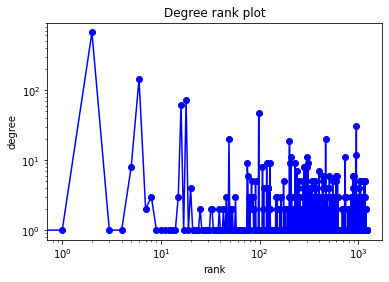

In [37]:
pools = pd.read_csv("../data/uniswap_v2/polygon_pools.csv")
#pools = pools.loc[(pools.token0==shared.WMATIC) | (pools.token1==shared.WMATIC)]
pools = pools.values.tolist()
# pools

G = nx.Graph()
for pool in pools:
    token0 =pool[1]
    token1 = pool[2]
    G.add_edge(token0,token1)
nodes_degree = [(x,G.degree(x)) for x in G.nodes()]
wmatic = "0x0d500B1d8E8eF31E21C99d1Db9A6444d3ADf1270"

degree_sequence  = sorted(nodes_degree, key=lambda x: x[1],reverse=True)
degree_sequence = [i[1] for i in nodes_degree]
dmax = max(degree_sequence)

plt.loglog(degree_sequence, 'b-', marker='o')
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")

plt.show()

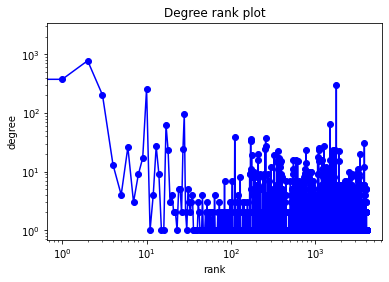

In [38]:
pools = pd.read_csv("../data/sushiswap/polygon_pools.csv")
#pools = pools.loc[(pools.token0==shared.WMATIC) | (pools.token1==shared.WMATIC)]
pools = pools.values.tolist()
# pools

G = nx.Graph()
for pool in pools:
    token0 =pool[1]
    token1 = pool[2]
    G.add_edge(token0,token1)
nodes_degree = [(x,G.degree(x)) for x in G.nodes()]
wmatic = "0x0d500B1d8E8eF31E21C99d1Db9A6444d3ADf1270"

degree_sequence  = sorted(nodes_degree, key=lambda x: x[1],reverse=True)
degree_sequence = [i[1] for i in nodes_degree]
dmax = max(degree_sequence)

plt.loglog(degree_sequence, 'b-', marker='o')
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")

plt.show()

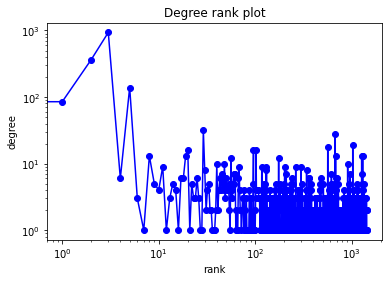

In [39]:
pools = pd.read_csv("../data/uniswap_v3/polygon_pools.csv")
#pools = pools.loc[(pools.token0==shared.WMATIC) | (pools.token1==shared.WMATIC)]
pools = pools.values.tolist()
# pools

G = nx.Graph()
for pool in pools:
    token0 =pool[1]
    token1 = pool[2]
    G.add_edge(token0,token1)
nodes_degree = [(x,G.degree(x)) for x in G.nodes()]
wmatic = "0x0d500B1d8E8eF31E21C99d1Db9A6444d3ADf1270"

degree_sequence  = sorted(nodes_degree, key=lambda x: x[1],reverse=True)
degree_sequence = [i[1] for i in nodes_degree]
dmax = max(degree_sequence)

plt.loglog(degree_sequence, 'b-', marker='o')
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")

plt.show()

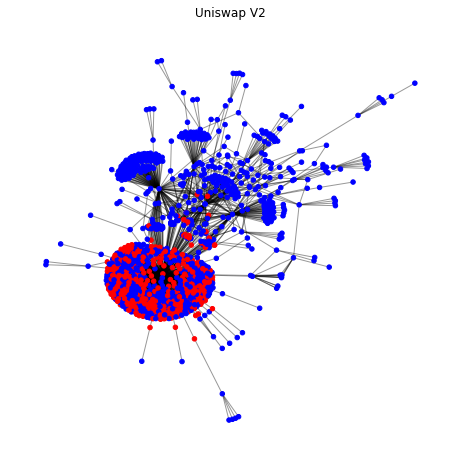

In [28]:
fig = plt.figure("Degree Plot", figsize=(8, 8))
axgrid = fig.add_gridspec(5, 4)
ax0 = fig.add_subplot()
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
color_map = []
scam_tokens = pd.read_csv('../data/uniswap_v2/polygon_malicious_tokens.csv').values.T.tolist()[0]
for node in Gcc:
    if node in scam_tokens:
        color_map.append('red')
    else: 
        color_map.append('blue')  
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20, node_color=color_map)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Uniswap V2")
ax0.set_axis_off()
plt.show()

In [ ]:
pools = pd.read_csv("../data/sushiswap/polygon_pools.csv")
#pools = pools.loc[(pools.token0==shared.WMATIC) | (pools.token1==shared.WMATIC)]
pools = pools.values.tolist()
# pools

G = nx.Graph()
for pool in pools:
    token0 =pool[1]
    token1 = pool[2]
    G.add_edge(token0,token1)
nodes_degree = [(x,G.degree(x)) for x in G.nodes()]
wmatic = "0x0d500B1d8E8eF31E21C99d1Db9A6444d3ADf1270"

degree_sequence  = sorted(nodes_degree, key=lambda x: x[1],reverse=True)
degree_sequence = [i[1] for i in nodes_degree]
dmax = max(degree_sequence)
fig = plt.figure("Degree Plot", figsize=(8, 8))
axgrid = fig.add_gridspec(5, 4)

fig = plt.figure("Degree Plot", figsize=(8, 8))
axgrid = fig.add_gridspec(5, 4)
ax0 = fig.add_subplot()
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
color_map = []
scam_tokens = pd.read_csv('../data/sushiswap/polygon_malicious_tokens.csv').values.T.tolist()[0]
for node in Gcc:
    if node in scam_tokens:
        color_map.append('red')
    else: 
        color_map.append('blue')  
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20, node_color=color_map)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("SushiSwap")
ax0.set_axis_off()
plt.show()

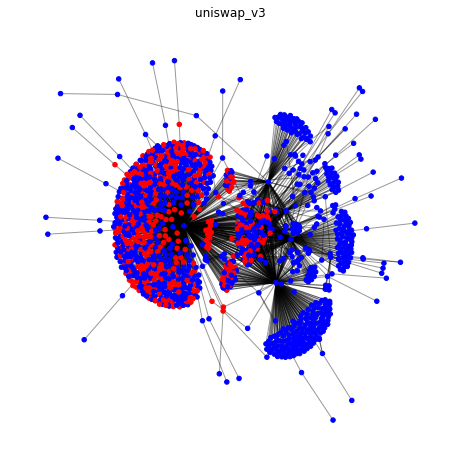

In [32]:
pools = pd.read_csv("../data/uniswap_v3/polygon_pools.csv")
#pools = pools.loc[(pools.token0==shared.WMATIC) | (pools.token1==shared.WMATIC)]
pools = pools.values.tolist()
# pools

G = nx.Graph()
for pool in pools:
    token0 =pool[1]
    token1 = pool[2]
    G.add_edge(token0,token1)
nodes_degree = [(x,G.degree(x)) for x in G.nodes()]
wmatic = "0x0d500B1d8E8eF31E21C99d1Db9A6444d3ADf1270"

degree_sequence  = sorted(nodes_degree, key=lambda x: x[1],reverse=True)
degree_sequence = [i[1] for i in nodes_degree]
dmax = max(degree_sequence)
fig = plt.figure("Degree Plot", figsize=(8, 8))
axgrid = fig.add_gridspec(5, 4)

fig = plt.figure("Degree Plot", figsize=(8, 8))
axgrid = fig.add_gridspec(5, 4)
ax0 = fig.add_subplot()
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
color_map = []
scam_tokens = pd.read_csv('../data/uniswap_v3/polygon_malicious_tokens.csv').values.T.tolist()[0]
for node in Gcc:
    if node in scam_tokens:
        color_map.append('red')
    else: 
        color_map.append('blue')  
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20, node_color=color_map)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("uniswap_v3")
ax0.set_axis_off()
plt.show()

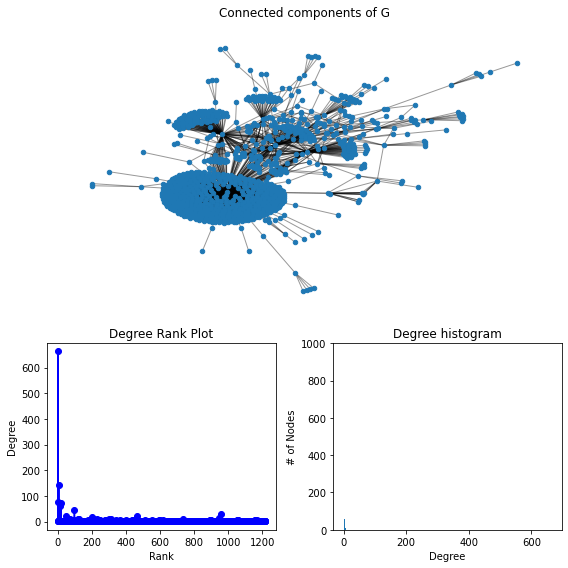

In [11]:


degree_sequence  = sorted(nodes_degree, key=lambda x: x[1],reverse=True)
degree_sequence = [i[1] for i in nodes_degree]
dmax = max(degree_sequence)
fig = plt.figure("Degree Plot", figsize=(8, 8))
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of G")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

# print(sorted(nodes_degree, key=lambda x: x[1],reverse=True))

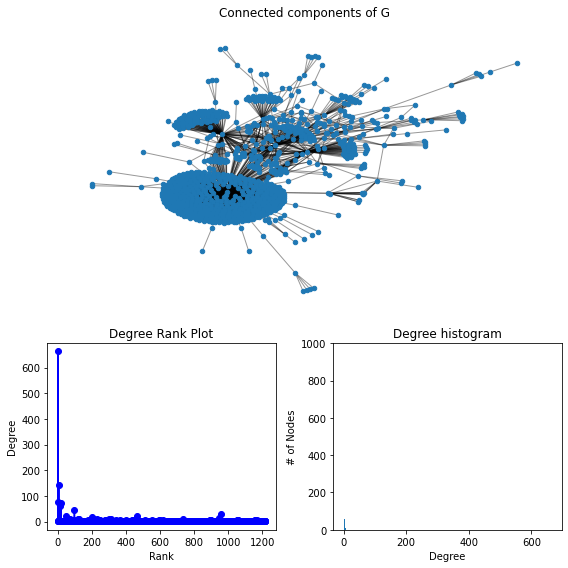

[('0x0d500B1d8E8eF31E21C99d1Db9A6444d3ADf1270', 663), ('0x2791Bca1f2de4661ED88A30C99A7a9449Aa84174', 143), ('0x7ceB23fD6bC0adD59E62ac25578270cFf1b9f619', 76), ('0xc2132D05D31c914a87C6611C10748AEb04B58e8F', 71), ('0x8174b243559BB4A2742B6c9b4c4f2070FFfCC467', 61), ('0x8f3Cf7ad23Cd3CaDbD9735AFf958023239c6A063', 47), ('0x7Ecb5699D8E0a6572E549Dc86dDe5A785B8c29BC', 31), ('0x0b3F868E0BE5597D5DB7fEB59E1CADBb0fdDa50a', 20), ('0x7D645CBbCAdE2A130bF1bf0528b8541d32D3f8Cf', 20), ('0xa3Fa99A148fA48D14Ed51d610c367C61876997F1', 19), ('0x5Af71a7e73658E6e2dF125B3fbA1ce4E2bf70EF0', 12), ('0x29F1e986FCa02B7E54138c04C4F503DdDD250558', 11), ('0x1BFD67037B42Cf73acF2047067bd4F2C47D9BfD6', 11), ('0x2F800Db0fdb5223b3C3f354886d907A671414A7F', 11), ('0x46123245B82dA0806F66A2cB68Fc10bFA3A0ca6f', 9), ('0x2EA3E8f750cbc55C293E6008E8B5a654eBBd0600', 9), ('0x45c32fA6DF82ead1e2EF74d17b76547EDdFaFF89', 9), ('0x1b12bDef2d562E19dd3B8cB66F61f1e1b714d491', 9), ('0xb371248Dd0f9E4061ccf8850E9223Ca48Aa7CA4b', 9), ('0xef7294D508

In [98]:
pools = pd.read_csv("../data/uniswap_v2/polygon_pools.csv")
#pools = pools.loc[(pools.token0==shared.WMATIC) | (pools.token1==shared.WMATIC)]
pools = pools.values.tolist()
# pools

G = nx.Graph()
for pool in pools:
    token0 =pool[1]
    token1 = pool[2]
    G.add_edge(token0,token1)
nodes_degree = [(x,G.degree(x)) for x in G.nodes()]
wmatic = "0x0d500B1d8E8eF31E21C99d1Db9A6444d3ADf1270"

degree_sequence  = sorted(nodes_degree, key=lambda x: x[1],reverse=True)
degree_sequence = [i[1] for i in nodes_degree]
dmax = max(degree_sequence)
fig = plt.figure("Degree Plot", figsize=(8, 8))
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of G")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

print(sorted(nodes_degree, key=lambda x: x[1],reverse=True))

In [60]:
tokens = [x for x in G.neighbors(wmatic)]

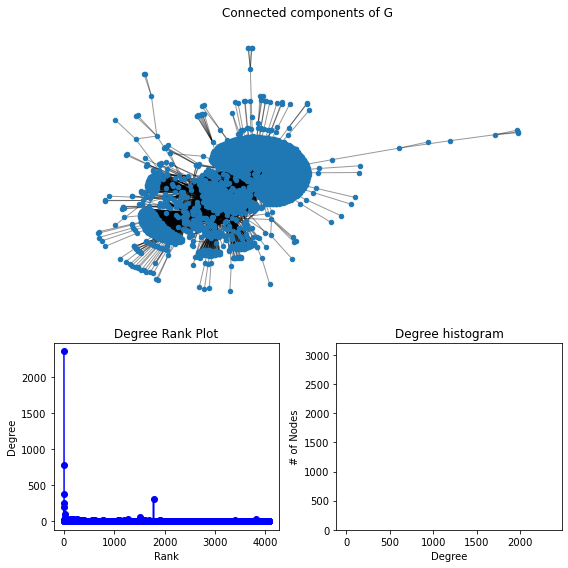

In [85]:
pools = pd.read_csv("../data/sushiswap/polygon_pools.csv")
#pools = pools.loc[(pools.token0==shared.WMATIC) | (pools.token1==shared.WMATIC)]
pools = pools.values.tolist()
# pools

G = nx.Graph()
for pool in pools:
    token0 =pool[1]
    token1 = pool[2]
    G.add_edge(token0,token1)
nodes_degree = [(x,G.degree(x)) for x in G.nodes()]
wmatic = "0x0d500B1d8E8eF31E21C99d1Db9A6444d3ADf1270"

degree_sequence  = sorted(nodes_degree, key=lambda x: x[1],reverse=True)
degree_sequence = [i[1] for i in nodes_degree]
dmax = max(degree_sequence)
fig = plt.figure("Degree Plot", figsize=(8, 8))
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of G")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

print(degree_sequence)

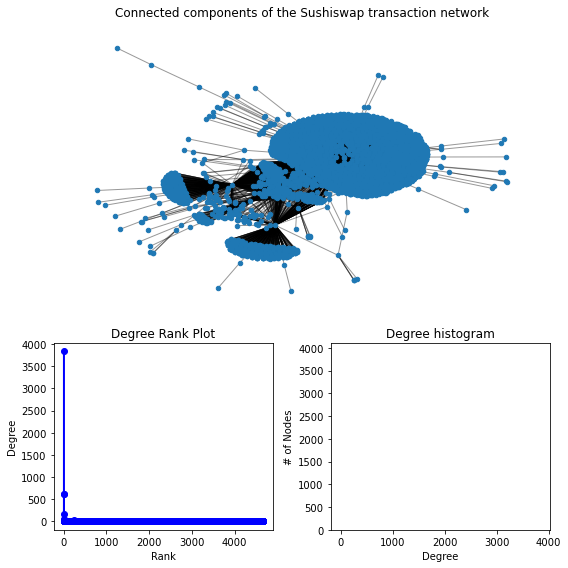

In [40]:
pools = pd.read_csv("../data/sushiswap/etherscan_pools.csv")
#pools = pools.loc[(pools.token0==shared.WMATIC) | (pools.token1==shared.WMATIC)]
pools = pools.values.tolist()
# pools

G = nx.Graph()
for pool in pools:
    token0 =pool[1]
    token1 = pool[2]
    G.add_edge(token0,token1)
nodes_degree = [(x,G.degree(x)) for x in G.nodes()]
wmatic = "0x0d500B1d8E8eF31E21C99d1Db9A6444d3ADf1270"

degree_sequence  = sorted(nodes_degree, key=lambda x: x[1],reverse=True)
degree_sequence = [i[1] for i in nodes_degree]
dmax = max(degree_sequence)
fig = plt.figure("Degree Plot", figsize=(8, 8))
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of the Sushiswap transaction network")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

# print(sorted(nodes_degree, key=lambda x: x[1],reverse=True))

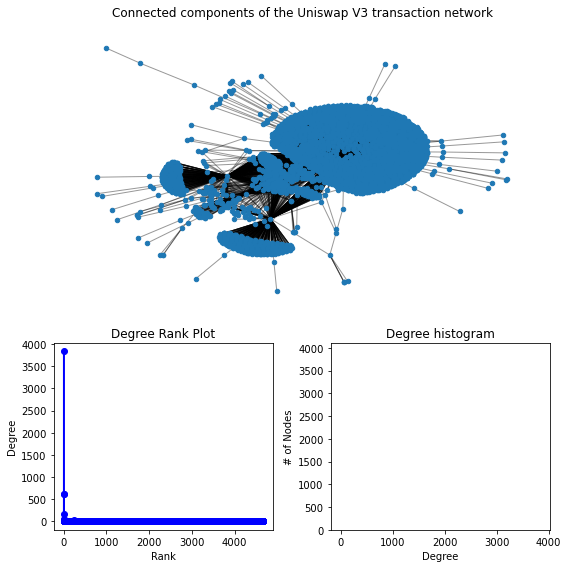

[('0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2', 3837), ('0xdAC17F958D2ee523a2206206994597C13D831ec7', 626), ('0xA0b86991c6218b36c1d19D4a2e9Eb0cE3606eB48', 607), ('0x6B175474E89094C44Da98b954EedeAC495271d0F', 169), ('0x2260FAC5E5542a773Aa44fBCfeDf7C193bc2C599', 63), ('0x1f9840a85d5aF5bf1D1762F925BDADdC4201F984', 38), ('0x853d955aCEf822Db058eb8505911ED77F175b99e', 20), ('0x95aD61b0a150d79219dCF64E1E6Cc01f0B64C4cE', 17), ('0xC581b735A1688071A1746c968e0798D642EDE491', 17), ('0x514910771AF9Ca656af840dff83E8264EcF986CA', 15), ('0xa47c8bf37f92aBed4A126BDA807A7b7498661acD', 15), ('0x99D8a9C45b2ecA8864373A26D1459e3Dff1e17F3', 14), ('0x6B4c7A5e3f0B99FCD83e9c089BDDD6c7FCe5c611', 13), ('0xc00e94Cb662C3520282E6f5717214004A7f26888', 12), ('0x5f98805A4E8be255a32880FDeC7F6728C6568bA0', 12), ('0x2b591e99afE9f32eAA6214f7B7629768c40Eeb39', 12), ('0x64aa3364F17a4D01c6f1751Fd97C2BD3D7e7f1D5', 12), ('0x956F47F50A910163D8BF957Cf5846D573E7f87CA', 11), ('0x03ab458634910AaD20eF5f1C8ee96F1D6ac54919', 11), ('0xc7

In [41]:
pools = pd.read_csv("../data/uniswap_v3/etherscan_pools.csv")
#pools = pools.loc[(pools.token0==shared.WMATIC) | (pools.token1==shared.WMATIC)]
pools = pools.values.tolist()
# pools

G = nx.Graph()
for pool in pools:
    token0 =pool[1]
    token1 = pool[2]
    G.add_edge(token0,token1)
nodes_degree = [(x,G.degree(x)) for x in G.nodes()]
wmatic = "0x0d500B1d8E8eF31E21C99d1Db9A6444d3ADf1270"

degree_sequence  = sorted(nodes_degree, key=lambda x: x[1],reverse=True)
degree_sequence = [i[1] for i in nodes_degree]
dmax = max(degree_sequence)
fig = plt.figure("Degree Plot", figsize=(8, 8))
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of the Uniswap V3 transaction network")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

print(sorted(nodes_degree, key=lambda x: x[1],reverse=True))

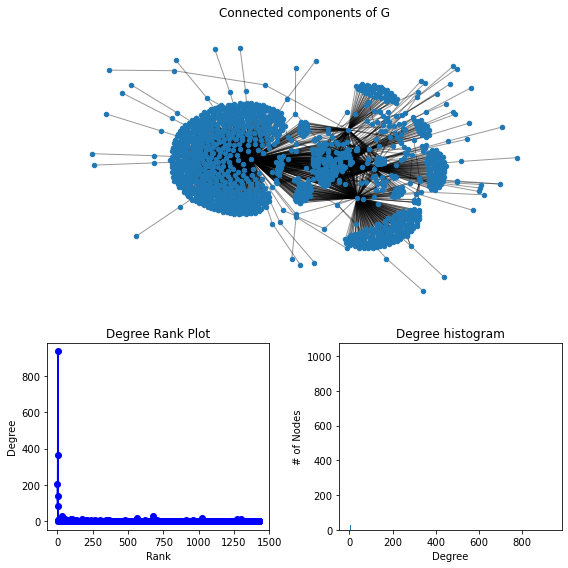

[('0x0d500B1d8E8eF31E21C99d1Db9A6444d3ADf1270', 934), ('0x2791Bca1f2de4661ED88A30C99A7a9449Aa84174', 366), ('0x7ceB23fD6bC0adD59E62ac25578270cFf1b9f619', 207), ('0xc2132D05D31c914a87C6611C10748AEb04B58e8F', 139), ('0x8f3Cf7ad23Cd3CaDbD9735AFf958023239c6A063', 85), ('0x1BFD67037B42Cf73acF2047067bd4F2C47D9BfD6', 32), ('0x550D11714ad6DdEe6916B18fE67285c261903f24', 28), ('0x7Ecb5699D8E0a6572E549Dc86dDe5A785B8c29BC', 19), ('0x7D645CBbCAdE2A130bF1bf0528b8541d32D3f8Cf', 18), ('0xb33EaAd8d922B1083446DC23f610c2567fB5180f', 16), ('0x67B78D31A40dACC5aCf7648C2Ad88bDBF6EeEc1C', 16), ('0xD6DF932A45C0f255f85145f286eA0b292B21C90B', 16), ('0xA1c57f48F0Deb89f569dFbE6E2B7f46D33606fD4', 13), ('0xa3Fa99A148fA48D14Ed51d610c367C61876997F1', 13), ('0xA9B8e4BE7e4Fc1B1d28B396af7c4CBa37979bC0F', 13), ('0x1fe40DAe6923530B392d5A86A3E7006218CBDbd4', 13), ('0x20ce796B55Aaad56BD4205EED6011B2A19bC9F7E', 13), ('0x172370d5Cd63279eFa6d502DAB29171933a610AF', 12), ('0x6AE7Dfc73E0dDE2aa99ac063DcF7e8A63265108c', 12), ('0x45c

In [94]:
pools = pd.read_csv("../data/uniswap_v3/polygon_pools.csv")
#pools = pools.loc[(pools.token0==shared.WMATIC) | (pools.token1==shared.WMATIC)]
pools = pools.values.tolist()
# pools

G = nx.Graph()
for pool in pools:
    token0 =pool[1]
    token1 = pool[2]
    G.add_edge(token0,token1)
nodes_degree = [(x,G.degree(x)) for x in G.nodes()]
wmatic = "0x0d500B1d8E8eF31E21C99d1Db9A6444d3ADf1270"

degree_sequence  = sorted(nodes_degree, key=lambda x: x[1],reverse=True)
degree_sequence = [i[1] for i in nodes_degree]
dmax = max(degree_sequence)
fig = plt.figure("Degree Plot", figsize=(8, 8))
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of G")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

print(sorted(nodes_degree, key=lambda x: x[1],reverse=True))